In [1]:
import matplotlib.pyplot as plt
from random import random
from numpy import zeros, sqrt, sum


def force_func(t, end): #forces clapping, used in app_sim
    if t <= end:
        return 1
    else:
        return 0
        
def feedback_alpha(alpha, nC, population): # f'(alpha) in research notes
    return alpha * nC / (population - 1)
    
def feedback_beta(beta, nC, population): #g'(beta) in research notes
    return 1 / (1 + beta * nC / (population - 1))
    
def quad_eq(x,y,z,sign): #standard quadratic eq to solve for roots
    return (-y + sign * (sqrt((y ** 2) - 4 * x * z))) / 2 * x

def frange(start, stop, step): #more precise range function
    i = start
    while i < stop:
        yield i
        i += step
        
def app_sim(aStoC, bCtoS, alpha, beta, N, M, t, t_1): #actual simulation function
    population = N * M                                #N,M dictates size of matrix of audience
    AGENT = zeros((N,M))                              #t -> number of iterations; t_1 -> length of forcing function
    graph = []

    for k in range(t):
        nC = sum(AGENT) #number of people clapping
        graph.append(nC)
        for i in range(N):
            for j in range(M):
                if AGENT[i,j] == 0:
                    if random() <= aStoC * (1 - (1-force_func(k, t_1)) * (1 - feedback_alpha(alpha, nC, population))):
                        AGENT[i,j] += 1
                else:
                    if random() <= bCtoS * feedback_beta(beta, nC, population):
                        AGENT[i,j] -= 1
    return graph
    
def steady_nC(aStoC, bCtoS, alpha, beta, population, sign): #solves for steady clapping population for given parameters
    if beta == 0:
        if alpha == 0:
            return (aStoC * population) / (aStoC+bCtoS)
        else:
            if sign == 1:
                return population - (bCtoS * (population - 1)) / (aStoC * alpha)
            else:
                return 0
    else:
        if alpha == 0:
            return 0
        else:
            if sign == 0:
                return 0
            else:
                return quad_eq(-aStoC*alpha*beta, (population*aStoC*alpha*beta)-(population*aStoC*alpha)+(aStoC*alpha), ((population**2)*aStoC*alpha) - (population*aStoC*alpha) - ((population**2)*bCtoS) + (2*population*bCtoS) - (bCtoS), sign)
    


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in sqrt


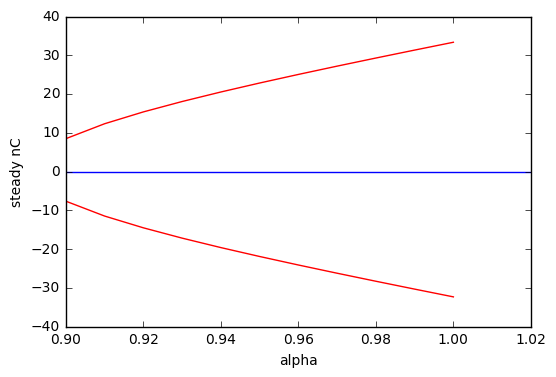

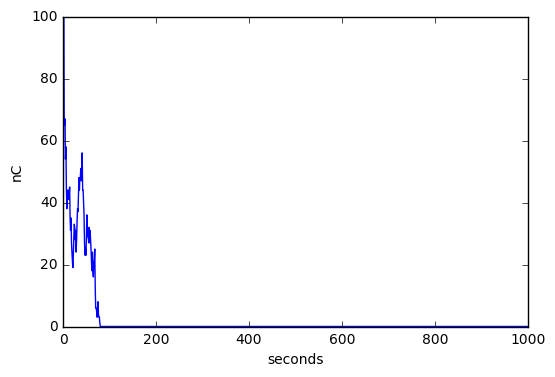

In [19]:
N = 10 #parameters; feel free to edit these
M = 10
time = 1000
t_1 = 3
aStoC = 1
bCtoS = 0.9
alpha = 1
beta = 1

xgraph = []
ygraph = []
y2graph= []

for v in frange(0.01,1.01,0.01): #creates lists for alpha versus nC_(infinity) at varyings a,b,beta
    steady_nC_1 = steady_nC(aStoC, bCtoS, v, beta, N*M, 1)
    steady_nC_2 = steady_nC(aStoC, bCtoS, v, beta, N*M, -1)#population - (bCtoS * (population - 1)) / (aStoC * alpha)
    xgraph.append(v)
    ygraph.append(steady_nC_1)
    y2graph.append(steady_nC_2)
    
  
plt.plot(xgraph,ygraph, color='r')
plt.plot(xgraph,y2graph, color='r')
plt.axhline(steady_nC(aStoC, bCtoS, alpha, beta, N*M, 0), color='b')
plt.xlabel('alpha')
plt.ylabel('steady nC')


plt.show()

plt.plot(app_sim(aStoC, bCtoS, alpha, beta, N, M, time, t_1))
plt.ylabel('nC')
plt.xlabel('seconds')
plt.show()

TypeError: object of type 'generator' has no len()